In [1]:
import geopandas as gpd
import datetime

In [2]:
file = "/home/delta/devel/spotthedifference/michael/data/connor_2020-02-10T13_39_00-07_00.geojson"

In [3]:
df = gpd.read_file(file)

In [4]:
df.head(2)

,algorithm,background_maximum_return,background_mean_return,background_minimum_return,centroid_lat,centroid_lon,change_area,compactness,detect_strength,detect_type,...,shape_extent_minor,shape_orientation,target_maximum_return,target_mean_return,target_minimum_return,target_total_return,timestamp,weighted_centroid_lat,weighted_centroid_lon,geometry
0,ACD-29August2019,7.82,3.15,0.02,33.066993,41.831021,329.63,1.0846,-26.4,Departure,...,18.09,56.5993,1873.72,905.93,101.19,6341.48,2018-11-06T00:00:00,33.067041,41.831040,POINT Z (41.83098 33.06712 0.00000)
1,ACD-29August2019,23.01,8.48,1.59,33.065138,41.833288,423.81,1.0200,-25.4,Departure,...,19.94,58.2825,2993.64,980.92,49.94,8828.28,2018-11-06T00:00:00,33.065097,41.833273,POINT Z (41.83325 33.06526 0.00000)


In [5]:
print(df.columns)

Index(['algorithm', 'background_maximum_return', 'background_mean_return',
       'background_minimum_return', 'centroid_lat', 'centroid_lon',
       'change_area', 'compactness', 'detect_strength', 'detect_type',
       'eccentricity', 'iids', 'name', 'perimeter', 'pixel_count',
       'processing_type', 'ref_azimuth_angle', 'ref_graze_angle',
       'return_units', 'sec_azimuth_angle', 'sec_graze_angle',
       'shape_extent_major', 'shape_extent_minor', 'shape_orientation',
       'target_maximum_return', 'target_mean_return', 'target_minimum_return',
       'target_total_return', 'timestamp', 'weighted_centroid_lat',
       'weighted_centroid_lon', 'geometry'],
      dtype='object')


In [6]:
df["timestamp_dt"] = df["timestamp"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S"))

In [7]:
df["timestamp_dt"].head(10)

0   2018-11-06
1   2018-11-06
2   2018-11-12
3   2018-11-12
4   2018-11-17
5   2018-11-17
6   2018-11-17
7   2018-11-29
8   2018-11-30
9   2018-12-05
Name: timestamp_dt, dtype: datetime64[ns]

In [8]:
df.loc[df["detect_type"] == "Departure"].head(2)

,algorithm,background_maximum_return,background_mean_return,background_minimum_return,centroid_lat,centroid_lon,change_area,compactness,detect_strength,detect_type,...,shape_orientation,target_maximum_return,target_mean_return,target_minimum_return,target_total_return,timestamp,weighted_centroid_lat,weighted_centroid_lon,geometry,timestamp_dt
0,ACD-29August2019,7.82,3.15,0.02,33.066993,41.831021,329.63,1.0846,-26.4,Departure,...,56.5993,1873.72,905.93,101.19,6341.48,2018-11-06T00:00:00,33.067041,41.831040,POINT Z (41.83098 33.06712 0.00000),2018-11-06
1,ACD-29August2019,23.01,8.48,1.59,33.065138,41.833288,423.81,1.0200,-25.4,Departure,...,58.2825,2993.64,980.92,49.94,8828.28,2018-11-06T00:00:00,33.065097,41.833273,POINT Z (41.83325 33.06526 0.00000),2018-11-06


Text(0, 0.5, 'Number of departures')

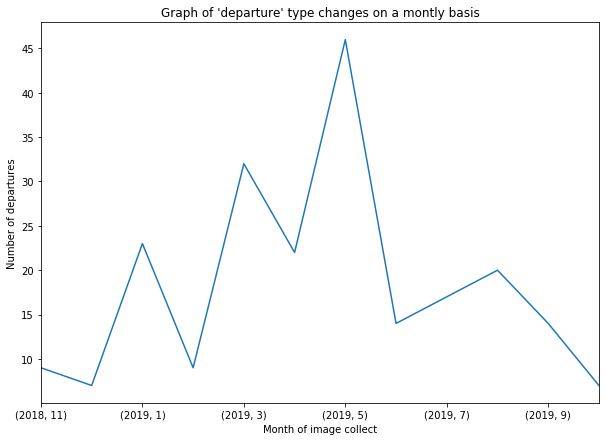

In [9]:
df_departures = df.loc[df["detect_type"] == "Departure"]
departures_by_month = df_departures.groupby([
    df_departures["timestamp_dt"].apply(lambda x: x.year),
    df_departures["timestamp_dt"].apply(lambda x: x.month)])["detect_type"].count()

ax = departures_by_month.plot(figsize=(10,7))
ax.set_title("Graph of 'departure' type changes on a montly basis")
ax.set_xlabel("Month of image collect")
ax.set_ylabel("Number of departures")

Text(0, 0.5, 'Number of departures')

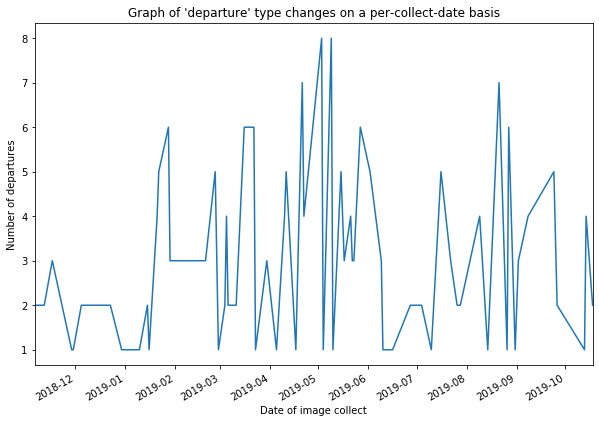

In [10]:
departures_by_date = df_departures.groupby(df_departures["timestamp_dt"])["detect_type"].count()

ax = departures_by_date.plot(figsize=(10,7))
ax.set_title("Graph of 'departure' type changes on a per-collect-date basis")
ax.set_xlabel("Date of image collect")
ax.set_ylabel("Number of departures")